# Secretary Problem

A project for the `Statistics and Life` Course.

### Problem Description
If you haven't heard of this problem before, you can look it up __[here](https://en.wikipedia.org/wiki/Secretary_problem)__ to get the comprehensive knowledge about it.   
   
Basically, it's a problem about selecting the best option in n candidates. Apparently, there will be a value for each option, and your goal is to find the best one under some constraints. The constraint is that you can only view one option at a time, and after the option is viewed, you could either discard the option or select it as your final answer. Once an option is discarded, you cannot recall it.   

### 37-Rule Solution
One of the solutions to this problem is the __37-rule__. The concept is to discard the first m percent of the options, and memorize the greatest value x among the first m%. Then, once you find an option which have a value greater than x, you immediately select it.   
**37-rule tells us that when m is 37, you will have the highest probability to get the best option.**   

If you're interested in the scientific explanation about the 37 rule, here are some articles that I think are easy to understand.

1. https://plus.maths.org/content/mathematical-dating
2. https://math.stackexchange.com/questions/391313/deriving-the-37-percent-rule-for-dating

### Goal
Although it has been proven that 37(or to be more specific, 1/e) can maximize the opportunity of selecting the best applicant, we still want to try it out and see if experiment matches the theory. The goal is to use python to simulate the solution with different value of m, and draw the result graphs to verify if the 37-rule is true.

# Simulation

The following script uses `python3`

### Import Modules

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt

### Generateing Data
First, we would like to have a random sample of integers to get start with.<br><br>
We use the `scipy.stats.norm` module to create a normal distribution random variable for our sample.   
Let's assume that the average score for the candidates is 60 and the standard deviation is 5.

In [3]:
mean = 60
std = 5
rv = norm(mean, std)

<br>
We can generate a random sample from the random variable by the method `rvs`

In [4]:
rv.rvs(size=10)

array([63.11108996, 58.8148397 , 58.58070349, 66.79783593, 66.16362976,
       49.5339512 , 67.00671444, 62.28305475, 57.7102571 , 57.68115642])

<br>
Let's draw a probability density function for our random variable to have a better idea about the random variable

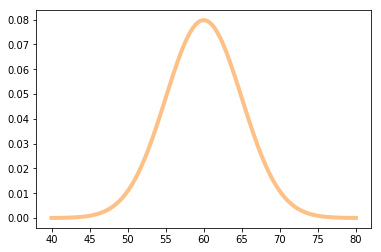

In [5]:
std_num = 4 # determine how width the distribution will be
mean, std = rv.mean(), rv.std()

xs = np.linspace(mean - std_num*std, mean + std_num*std, 100)
ys = rv.pdf(xs)
    
plt.plot(xs, ys, linewidth=4, color='#fdc086')

### Simulate
Now we have our data ready, its time to construct a function that simulates the stopping rule:<br>
We let the **m%** and **sample** to be the input of the function, and the function will return the result that it gets from the stopping rule.

In [6]:
def m_rule(sample:list, m:int, scale:int=100):
    """Simulate the m_rule on the input sample, and return the result."""
    
    actual_thresh = int(round(len(sample)*m/scale, 1))

    if actual_thresh == 0:
        return(sample[0])

    # find the best value within threshhold
    best_in_thresh = sample[0]
    for value in sample[:actual_thresh]:
        best_in_thresh = value if value > best_in_thresh else best_in_thresh

    # find the result
    for value in sample[actual_thresh:]:
        if value > best_in_thresh:
            return(value)

    # if the best value is in the threshhold unfortunately, return the last value in sample.
    return(sample[-1])
    

<br>
Let's try it with with a single sample with 100 data in it.

[63.08658308 66.25669104 61.60413227 62.19071364 62.93537209 67.35521158
 53.51775258 58.72274215 67.64540883 68.9044435  64.29883787 65.80988204
 58.29702605 64.51041746 54.9280062  53.86550637 61.64364629 59.69882026
 61.35334801 61.12091116 62.67654577 65.31286374 58.07937763 59.02703551
 56.98200531 64.52011989 55.66423119 57.40991465 73.14963379 52.45061371
 64.5495968  61.29668624 53.28677648 61.73435398 62.01205386 66.83003842
 49.70559581 58.41832046 55.62130946 56.84314008 61.60758113 52.40500009
 59.34947809 52.27616502 64.68367738 59.82618633 65.16058177 53.35482769
 57.05171808 60.09179046 59.68783424 54.81885937 66.6167865  62.00971605
 56.07430851 59.31074581 63.59702037 64.6816742  64.11072148 51.69219324
 61.44084834 54.00606737 55.08545607 53.39045615 57.73320371 63.5844613
 59.74668322 62.24253811 66.50400039 65.80244728 51.05658176 59.07543167
 62.47906446 63.36324419 57.42518448 52.47651647 56.79107092 64.4327237
 51.86470265 57.98586657 63.44811697 55.96270875 63.0

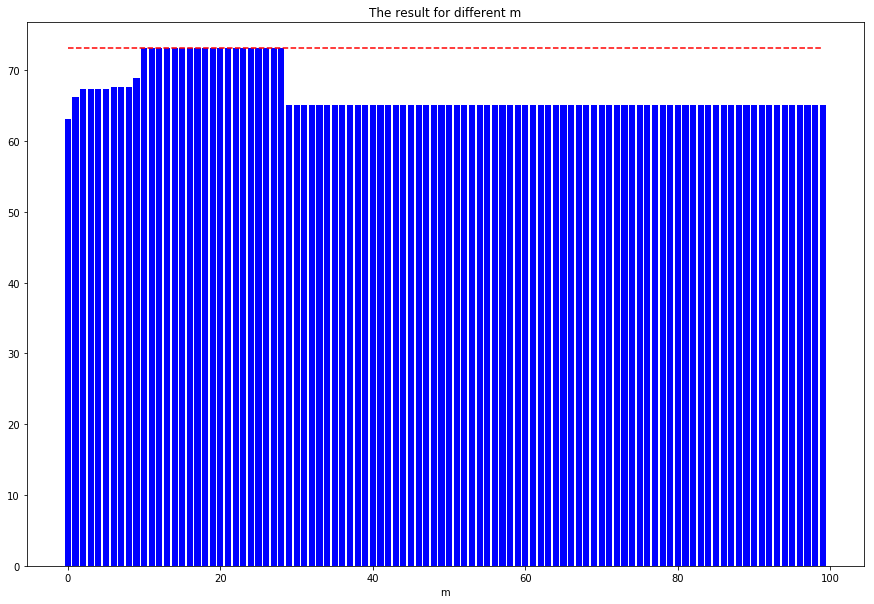

In [7]:
sample = rv.rvs(100)
print(sample)

results = []
for m in range(100):
    m_result = m_rule(sample, m)
    results.append(m_result)

fig, ax = plt.subplots(figsize=(15, 10))
xs = np.linspace(0, 99, 100)

#plot the best value in sample as a line
line_value = [max(sample) for i in range(len(xs))]
ax.plot(xs, line_value, 'r--')

#plot the results as bar charts
ax.bar(xs, results, color="blue")
  
ax.set_title('The result for different m')
ax.set_xlabel('m')

plt.show()

From the above plot, it seems that it is hard to tell which m is the best value for the stopping rule,<br>because the results varies a lot from each simulation.<br><br>
Therefore, let's **do the simulation multiple times and see which m has the best chance to get the greatest value**.

### Multiple Simulation
We save all the results for different m in each simulation in a big 2D numpy array **result**,<br>
and the best value in each simulation in a numpy array **best_values**

In [8]:
simulate_freq = 10000
sample_size = 100
m_scale = 100

result = np.empty(shape=[m_scale, simulate_freq]) # a big 2D array that records the results for each simulation
best_values = np.empty([simulate_freq]) # a 1D array that records the best value for each simulation's sample

for sim_count in range(simulate_freq):
    sample = rv.rvs(sample_size)
    x = max(sample) # x is the best value in that sample
    best_values[sim_count] = x

    for m in range(m_scale):
        result[m, sim_count] = m_rule(sample, m, scale=m_scale)



See what the **result** 2D array looks like

In [9]:
col_name = ["sim{}".format(i+1) for i in range(simulate_freq)]
pd.DataFrame(result, columns=col_name)

,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10,...,sim9991,sim9992,sim9993,sim9994,sim9995,sim9996,sim9997,sim9998,sim9999,sim10000
0,57.062475,65.027413,65.613890,59.605369,57.880338,65.020510,72.194124,59.499216,65.280724,61.262420,...,61.107457,60.321605,59.020968,49.629095,62.488891,64.248568,73.173250,58.295673,60.024027,66.675670
1,60.204152,74.860748,73.093336,59.654651,67.719722,66.217591,74.407728,60.629350,70.180266,68.460290,...,63.189071,70.848517,62.554217,58.107024,64.168185,65.202982,55.939972,64.498994,70.701885,67.420899
2,60.922310,74.860748,73.093336,59.654651,71.901942,66.217591,74.407728,60.629350,70.180266,68.460290,...,68.689308,71.521388,62.554217,61.723424,64.168185,65.202982,55.939972,66.214902,70.701885,67.420899
3,60.922310,74.860748,73.093336,64.579202,71.901942,66.217591,74.407728,67.344081,70.180266,68.460290,...,68.689308,71.521388,62.554217,63.497124,64.168185,66.022299,55.939972,66.214902,72.120385,67.420899
4,60.922310,74.860748,61.246887,64.579202,71.901942,66.217591,74.407728,67.344081,70.180266,68.460290,...,70.084265,71.521388,70.402339,63.497124,64.168185,66.022299,55.939972,66.214902,72.120385,67.420899
5,60.922310,74.860748,61.246887,66.816359,71.901942,66.217591,74.407728,73.013233,70.180266,68.560787,...,70.084265,71.521388,70.402339,63.497124,64.168185,66.022299,55.939972,66.214902,72.120385,67.420899
6,61.044136,74.860748,61.246887,66.816359,71.901942,66.217591,74.407728,73.013233,70.180266,68.560787,...,70.084265,71.521388,70.402339,64.640719,64.168185,66.022299,55.939972,66.214902,72.120385,67.420899
7,61.044136,74.860748,61.246887,66.816359,71.901942,71.013048,74.407728,73.013233,70.180266,68.560787,...,70.084265,71.521388,70.402339,64.640719,64.168185,66.022299,55.939972,66.214902,72.120385,67.420899
8,61.044136,53.393567,61.246887,66.816359,71.901942,71.013048,74.407728,73.013233,70.180266,68.560787,...,70.084265,71.521388,70.997148,65.070865,64.168185,66.022299,55.939972,66.214902,72.120385,67.420899
9,61.044136,53.393567,61.246887,66.816359,71.901942,71.013048,74.407728,73.013233,70.180266,68.560787,...,70.084265,71.521388,70.997148,65.070865,64.168185,69.479022,55.939972,66.214902,72.120385,67.420899


<br>
We then use the 2 numpy array to draw the results in the bar plot<br>
To know which m has the highest performance, we highlight the one which has the highest probability to get the best value.

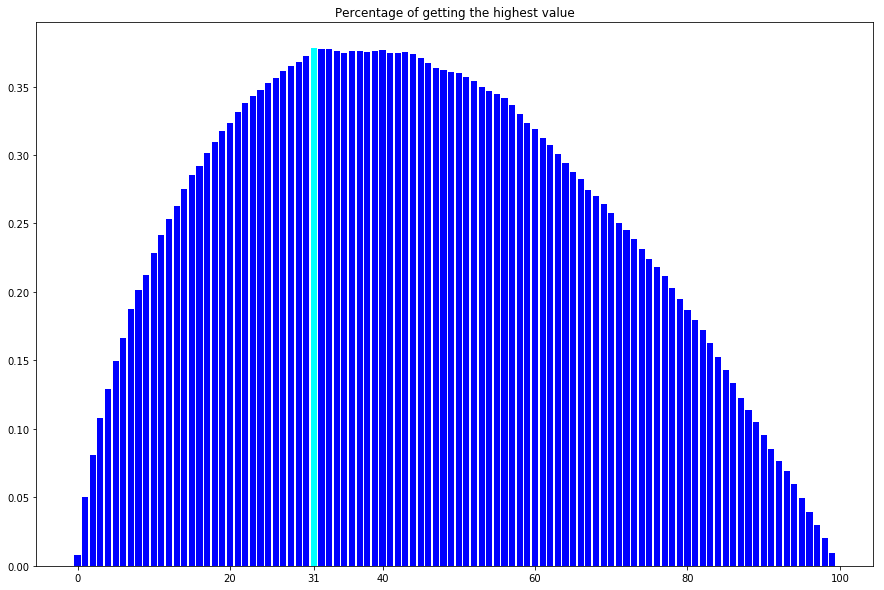

In [10]:
def count＿prob(m_array):
    return(np.sum(m_array == best_values)/simulate_freq)

xs_prob = np.apply_along_axis(count_prob, axis=1, arr=result)
best_m = np.argwhere(xs_prob == np.amax(xs_prob)).flatten()

fig, ax1 = plt.subplots(figsize=(15,10))
xs = np.linspace(0, m_scale-1, m_scale)

bars_color = np.full(m_scale, "blue")
bars_color[best_m] = "cyan" # the best performance m will have different color
xs_ticks = np.linspace(0, m_scale, 6)
xs_ticks = np.insert(xs_ticks, 0, best_m)
xs_ticks = np.sort(xs_ticks)

ax1.bar(xs, xs_prob, color=bars_color)
ax1.set_xticks(xs_ticks)
ax1.set_title('Percentage of getting the highest value')

plt.show()

We can see that when the simulation frequency grows, the result bar plot will have much clearer curve, and it is obvious that the better probability performance occur around 37.